# Student Exam Course Analysis

In this notebook we analyse the data, to find out what influnces students exam scores.

## Steps

To analyse and predict the data we first need to follow steps:
- load the data 
- analyse the data
- preprocess the data
- split the data
- build the model
- training the model
- evaluate the model

In [278]:
# importing all the relevant libraries

import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, callbacks
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the data

In [279]:
# we set student_id as our index
student_data = pd.read_csv('../data/student_exam_scores.csv', index_col='student_id')
student_data.head()

,hours_studied,sleep_hours,attendance_percent,previous_scores,exam_score
student_id,,,,,
S001,8.0,8.8,72.1,45,30.2
S002,1.3,8.6,60.7,55,25.0
S003,4.0,8.2,73.7,86,35.8
S004,3.5,4.8,95.1,66,34.0
S005,9.1,6.4,89.8,71,40.3


In [280]:
# checking for missing values for each column
student_data.isnull().sum()

hours_studied         0
sleep_hours           0
attendance_percent    0
previous_scores       0
exam_score            0
dtype: int64

As our data has no missing values we do not have to do imputation, otherwise we would have to choose between 3 different ways to deal with the missing values:
- dropping the columns with missing values
- replacing the missing values with the mean
- replacing the missing values with the mean and adding an additional row to notify that they have been imputed

__note: in this case we skip the preprocessing of the data.__

<Axes: title={'center': 'Student exam score in correlationt to hours studied'}, xlabel='hours_studied', ylabel='exam_score'>

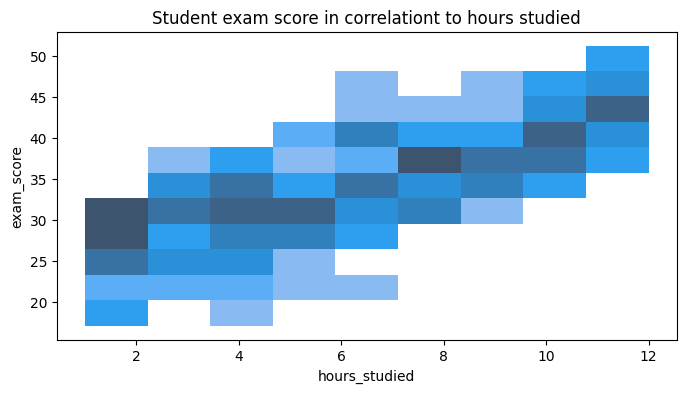

In [281]:
plt.figure(figsize=(8,4))
plt.title('Student exam score in correlationt to hours studied')
sns.histplot(x=student_data.hours_studied, y = student_data.exam_score)

## Spliting the data

In [282]:
df_train = student_data.sample(frac=0.7)
df_valid = student_data.drop(df_train.index)

_max = df_train.max()
_min = df_train.min()

df_train = (df_train - _min) / (_max - _min)
df_valid = (df_valid - _min) / (_max - _min)

In [283]:
# getting our X and y
X_train = df_train.drop('exam_score', axis=1)
y_train = df_train['exam_score']
X_valid = df_valid.drop('exam_score', axis=1)
y_valid = df_valid['exam_score']

print(f'shape of X_train: {X_train.shape}')
print(f'shape of X_valid: {X_valid.shape}')
print(f'shape of y_train: {y_train.shape}')
print(f'shape of y_valid: {y_valid.shape}')

shape of X_train: (140, 4)
shape of X_valid: (60, 4)
shape of y_train: (140,)
shape of y_valid: (60,)


## EarlyStopping
we add _early_stopping_ callback to stop the model from training incase there is no improvement.

In [284]:
early_stopping = callbacks.EarlyStopping(
    patience = 50, # How many epochs to wait before stopping 
    min_delta = 0.001, # min change to count as improvement
    restore_best_weights = True
)

In [285]:
model = keras.Sequential([
    layers.Dense(512, activation='relu', input_shape=[4]),
    layers.Dense(512, activation='relu', input_shape=[4]),
    layers.Dense(1, activation='relu')
])

/home/rownak/Documents/projects/deep-learning/.venv/lib/python3.13/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [286]:
model.compile(
    optimizer='adam',
    loss = 'mae'
)

In [287]:
history = model.fit(
    X_train, y_train,
    validation_data=[X_valid, y_valid],
    batch_size=128,
    epochs=500,
    callbacks=[early_stopping],
    verbose=True
)

Epoch 1/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step - loss: 0.4889 - val_loss: 0.2079
Epoch 2/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.1517 - val_loss: 0.1681
Epoch 3/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.2138 - val_loss: 0.1052
Epoch 4/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.1322 - val_loss: 0.1271
Epoch 5/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.1121 - val_loss: 0.1530
Epoch 6/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.1265 - val_loss: 0.1007
Epoch 7/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0918 - val_loss: 0.0715
Epoch 8/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.0894 - val_loss: 0.0866
Epoch 9/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.1076 - val_loss: 0.0681
Epoch 10/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.0836 - val_loss: 0.0845
Epoch 11/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0835 - val_loss: 0.1120
Epoch 12/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.1026 - val_l

<Axes: >

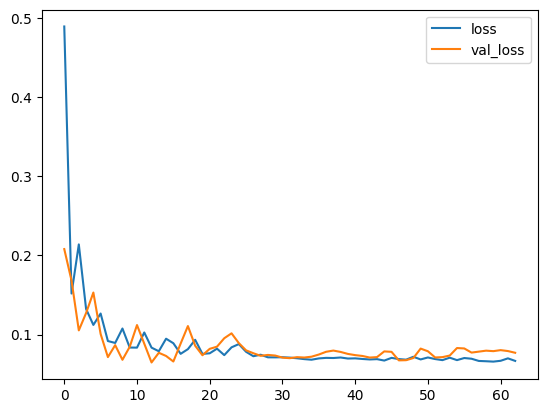

In [288]:
history_df = pd.DataFrame(history.history)

history_df.plot()

In [289]:
example = pd.DataFrame({'hours_studied': [1,12],	'sleep_hours': [1,12]	,'attendance_percent':[1.0, 100.0],	'previous_scores': [1,100]})
example

,hours_studied,sleep_hours,attendance_percent,previous_scores
0,1,1,1.0,1
1,12,12,100.0,100


In [290]:
predictions = model.predict(example)
i = 1
for student in predictions:
    print(f"student {i}: {student[0]:.2f}")
    i+=1

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
student 1: 1.09
student 2: 53.68


We have succesfully built our predictor model that can predict the results of the students based on the hours they studied! This method can be used with other data to predict outcomes or results of experiments or in medical field, detection of malignant cancers. 